In [36]:
from logistic import MnistLogisticRegression
from naive_bayes import MnistNaiveBayes
import numpy as np
from main import calculate_accuracy, hog_feature, load_mnist_data, pixel_intensity_feature, PCA

In [37]:
# Loading the mnist data
X_train, y_train, x_test, y_test = load_mnist_data()
X_train = pixel_intensity_feature(np.array(X_train))
x_test = pixel_intensity_feature(np.array(x_test))

In [39]:
def PCA_feature(images):
    pca = PCA(n_components=100)
    pca.fit(images)
    pca.transform(images[:1])
    np.dot(images[:1] - images.mean(axis=0), pca.components_.T) 
    return images

In [12]:
# Initalize the class object
logistic = MnistLogisticRegression(1500, 1.0)

In [18]:
# Using pure Row pixel intensity
w, b, loss = logistic.fit(np.array(X_train[:10000]), np.array(y_train[:10000]), c=10)

In [20]:
# Testing the Row intensity feature
predictions = logistic.predict(np.array(x_test))
accuracy = calculate_accuracy(predictions, np.array(y_test))
print("Accuracy", accuracy)

prediction
[[35.67942032 28.48980758 39.77500284 ... 51.31304948 38.27554248
  42.07898326]
 [61.02081852 58.17310768 68.1277206  ... 36.68691635 64.7974621
  50.16056244]
 [10.36518349 27.52501794 22.50875574 ... 21.01949431 23.62656613
  19.92039143]
 ...
 [49.99638977 53.73003682 57.17101998 ... 59.94520748 65.04674759
  63.58441804]
 [49.54252966 50.96033692 48.33611881 ... 46.33373145 57.25699541
  50.595012  ]
 [86.57703046 71.09272856 91.10909852 ... 70.51293838 83.33434998
  75.20215002]]
10000
[[35.67942032 28.48980758 39.77500284 ... 51.31304948 38.27554248
  42.07898326]
 [61.02081852 58.17310768 68.1277206  ... 36.68691635 64.7974621
  50.16056244]
 [10.36518349 27.52501794 22.50875574 ... 21.01949431 23.62656613
  19.92039143]
 ...
 [49.99638977 53.73003682 57.17101998 ... 59.94520748 65.04674759
  63.58441804]
 [49.54252966 50.96033692 48.33611881 ... 46.33373145 57.25699541
  50.595012  ]
 [86.57703046 71.09272856 91.10909852 ... 70.51293838 83.33434998
  75.20215002]]
A

In [13]:
# Using hog feature for training
features = hog_feature(np.array(X_train))
w, b, loss = logistic.fit(np.array(features[:10000]), np.array(y_train[:10000]), c=10)

In [ ]:
# Testing with hog feature
features_test = hog_feature(x_test)
predictions = logistic.predict(np.array(features_test))
accuracy = calculate_accuracy(predictions, np.array(y_test))
print("Accuracy", accuracy)

In [ ]:
# plot the result for hog
import matplotlib.pyplot as plt


# Plotting accuracy graph
plt.plot(range(len(accuracy)), accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.show()


In [15]:
# Using pca feature for trainig
PCA_feature(X_train)
PCA_feature(x_test)
w, b, loss = logistic.fit(np.array(X_train[:10000]), np.array(y_train[:10000]), c=10)

In [23]:
# Testing the pca feature using test data
prediction = logistic.predict(np.array(x_test))
accuracy = calculate_accuracy(prediction, np.array(y_test))
print("Accuracy: ", accuracy)

prediction
[[35.67942032 28.48980758 39.77500284 ... 51.31304948 38.27554248
  42.07898326]
 [61.02081852 58.17310768 68.1277206  ... 36.68691635 64.7974621
  50.16056244]
 [10.36518349 27.52501794 22.50875574 ... 21.01949431 23.62656613
  19.92039143]
 ...
 [49.99638977 53.73003682 57.17101998 ... 59.94520748 65.04674759
  63.58441804]
 [49.54252966 50.96033692 48.33611881 ... 46.33373145 57.25699541
  50.595012  ]
 [86.57703046 71.09272856 91.10909852 ... 70.51293838 83.33434998
  75.20215002]]
10000
[[35.67942032 28.48980758 39.77500284 ... 51.31304948 38.27554248
  42.07898326]
 [61.02081852 58.17310768 68.1277206  ... 36.68691635 64.7974621
  50.16056244]
 [10.36518349 27.52501794 22.50875574 ... 21.01949431 23.62656613
  19.92039143]
 ...
 [49.99638977 53.73003682 57.17101998 ... 59.94520748 65.04674759
  63.58441804]
 [49.54252966 50.96033692 48.33611881 ... 46.33373145 57.25699541
  50.595012  ]
 [86.57703046 71.09272856 91.10909852 ... 70.51293838 83.33434998
  75.20215002]]
A

Accuracy tests for different smoothing values for each feature extraction method on mnist Naive bayes implemenentation

In [16]:
X_train, y_train, X_test, y_test = load_mnist_data()
x_train = pixel_intensity_feature(np.array(X_train))
x_test = pixel_intensity_feature(np.array(X_test))

In [42]:
smoothing = [0.1, 0.5, 1.0, 10, 100, 1000]
feature_extractions = [pixel_intensity_feature, PCA_feature, hog_feature]
accuracy_levles = []
for smoothing_factor in smoothing:
    feature_extractions = [pixel_intensity_feature, PCA_feature, hog_feature]
    smoothing_accuracy = []
    for feature in feature_extractions:
        feature_accuracy = 0
        if feature == pixel_intensity_feature:
            prediction = MnistNaiveBayes(x_train, np.array(y_train), x_test, smoothing_factor)
            accuracy = calculate_accuracy(prediction, np.array(y_test))
            feature_accuracy += accuracy
        if feature == PCA_feature:
            features = PCA_feature(x_train)
            test_features = PCA_feature(x_test)
            prediction = MnistNaiveBayes(features, np.array(y_train), test_features, smoothing_factor)
            accuracy = calculate_accuracy(prediction, np.array(y_test))
            feature_accuracy += accuracy
        if feature == hog_feature:
            features = hog_feature(np.array(X_train))
            test_features = hog_feature(np.array(X_test))
            prediction = MnistNaiveBayes(features, np.array(y_train), test_features, smoothing_factor)
            accuracy = calculate_accuracy(prediction, np.array(y_test))
            feature_accuracy += accuracy
    
        smoothing_accuracy.append(feature_accuracy)
    accuracy_levles.append(smoothing_accuracy)

print(accuracy_levles)

.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
.................Mean for each class..........
[[0.7771, 0.7771, 0.8416], [0.6824, 0.6824, 0.8293], [0.6428, 0.6428, 0.8265], [0.5921, 0.5921, 0.8239], [0.5859, 0.5859, 0.8236], [0.5851, 0.5851, 0.8237

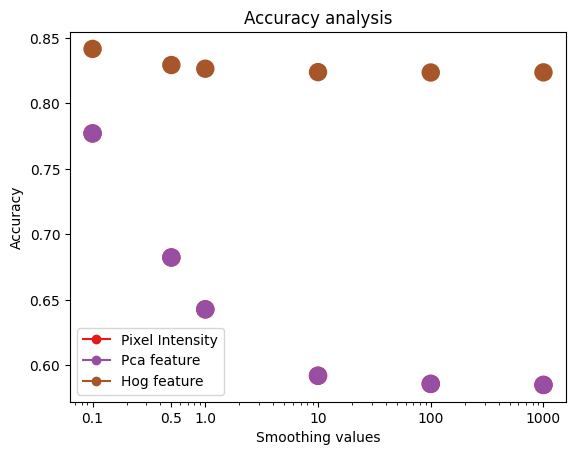

In [46]:
import matplotlib.pyplot as plt

def draw_plot(data, title, y_label, labels):

    x_values = [0.1, 0.5, 1.0, 10, 100, 1000]

    color_map = plt.get_cmap('Set1')
    num_colors = len(data[0])
    colors = [color_map(i/num_colors) for i in range(num_colors)]

    fig, ax = plt.subplots()

    for i in range(len(data)):
        ax.scatter([x_values[i]]*len(labels), data[i], marker='o', color=colors, label=i, s=150)

    ax.set_xscale('log') 
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)

    ax.set_xlabel('Smoothing values')
    ax.set_ylabel(y_label)

    ax.set_title(title)

    handles, _ = ax.get_legend_handles_labels()

    handles = [plt.Line2D([], [], marker='o', color=colors[i], label=labels[i]) for i in range(len(labels))]
    ax.legend(handles=handles)

    plt.show()


labels = ["Pixel Intensity", "Pca feature", "Hog feature"]
draw_plot(accuracy_levles, "Accuracy analysis", "Accuracy", labels)

Accuracy tests for different smoothing values for each feature extraction method on mnist Logistic regression implemenentation

In [48]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]
feature_extractions = [pixel_intensity_feature, PCA_feature, hog_feature]
accuracy_levles = []
for lr in learning_rates:
    feature_extractions = [pixel_intensity_feature, PCA_feature, hog_feature]
    smoothing_accuracy = []
    for feature in feature_extractions:
        feature_accuracy = 0
        if feature == pixel_intensity_feature:
            logistic = MnistLogisticRegression(1500, lr)
            w, b, loss = logistic.fit(np.array(X_train[:10000]), np.array(y_train[:10000]), c=10)
            predictions = logistic.predict(np.array(x_test))
            accuracy = calculate_accuracy(prediction, np.array(y_test))
            feature_accuracy += accuracy
            print(".......")
        if feature == PCA_feature:
            PCA_feature(X_train)
            PCA_feature(x_test)
            logistic = MnistLogisticRegression(1500, lr)
            w, b, loss = logistic.fit(np.array(X_train[:10000]), np.array(y_train[:10000]), c=10)
            predictions = logistic.predict(np.array(x_test))
            accuracy = calculate_accuracy(prediction, np.array(y_test))
            feature_accuracy += accuracy
            print(".......")
        if feature == hog_feature:
            features = hog_feature(X_train)
            logistic = MnistLogisticRegression(1500, lr)
            w, b, loss = logistic.fit(np.array(X_train[:10000]), np.array(y_train[:10000]), c=10)
            predictions = logistic.predict(np.array(x_test))
            accuracy = calculate_accuracy(prediction, np.array(y_test))
            feature_accuracy += accuracy
            print(".......")
    
        smoothing_accuracy.append(feature_accuracy)
    accuracy_levles.append(smoothing_accuracy)

print(accuracy_levles)

prediction
[[36.92871731 41.42328445 35.74972676 ... 38.13708518 39.0907616
  39.12643952]
 [56.33833335 53.58861637 51.73265366 ... 57.03302384 58.54923546
  51.86791447]
 [18.12065026 18.14192611 17.89614661 ... 20.25166428 16.3245264
  19.67547016]
 ...
 [59.91497601 54.80422925 57.66035879 ... 59.27728396 59.75182813
  60.83036274]
 [51.50625109 51.53699464 47.78908279 ... 52.94177157 52.73819725
  51.96562585]
 [86.5274626  76.13427031 75.14352227 ... 84.79373414 82.08074981
  78.45024443]]
10000
[[36.92871731 41.42328445 35.74972676 ... 38.13708518 39.0907616
  39.12643952]
 [56.33833335 53.58861637 51.73265366 ... 57.03302384 58.54923546
  51.86791447]
 [18.12065026 18.14192611 17.89614661 ... 20.25166428 16.3245264
  19.67547016]
 ...
 [59.91497601 54.80422925 57.66035879 ... 59.27728396 59.75182813
  60.83036274]
 [51.50625109 51.53699464 47.78908279 ... 52.94177157 52.73819725
  51.96562585]
 [86.5274626  76.13427031 75.14352227 ... 84.79373414 82.08074981
  78.45024443]]
...

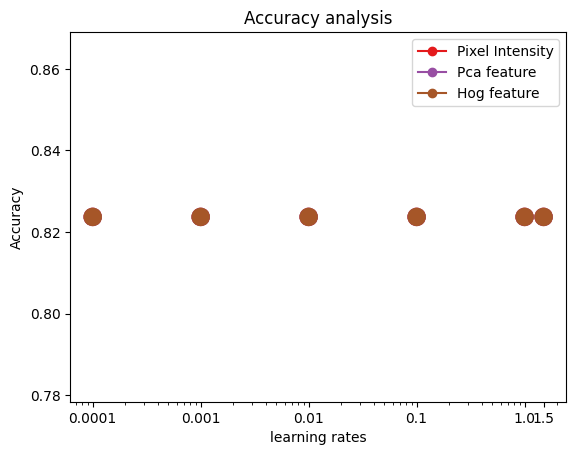

In [49]:
def draw_plot(data, title, y_label, labels):

    x_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]

    color_map = plt.get_cmap('Set1')
    num_colors = len(data[0])
    colors = [color_map(i/num_colors) for i in range(num_colors)]

    fig, ax = plt.subplots()

    for i in range(len(data)):
        ax.scatter([x_values[i]]*len(labels), data[i], marker='o', color=colors, label=i, s=150)

    ax.set_xscale('log') 
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values)

    ax.set_xlabel('learning rates')
    ax.set_ylabel(y_label)

    ax.set_title(title)

    handles, _ = ax.get_legend_handles_labels()

    handles = [plt.Line2D([], [], marker='o', color=colors[i], label=labels[i]) for i in range(len(labels))]
    ax.legend(handles=handles)

    plt.show()


labels = ["Pixel Intensity", "Pca feature", "Hog feature"]
draw_plot(accuracy_levles, "Accuracy analysis", "Accuracy", labels)